In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Prepare features and targets
features = synthetic_df[['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'PRECTOTCORR', 'QV2M', 'WS2M_RANGE']]
targets = {
    'maize_fall_armyworm': synthetic_df['maize_fall_armyworm'],
    'maize_ear_rot': synthetic_df['maize_ear_rot'],
    'maize_stem_borer': synthetic_df['maize_stem_borer']
}

In [19]:
# Store trained models
models = {}

In [20]:
# Train model & plot confusion matrix
def train_and_plot_confusion(pest):
    X_train, X_test, y_train, y_test = train_test_split(features, targets[pest], test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models[pest] = model
    
    print(f"\n🪲 {pest.upper()} Classification Report")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=["low", "moderate", "high"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["low", "moderate", "high"], 
                yticklabels=["low", "moderate", "high"])
    plt.title(f'{pest} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


🪲 MAIZE_FALL_ARMYWORM Classification Report
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



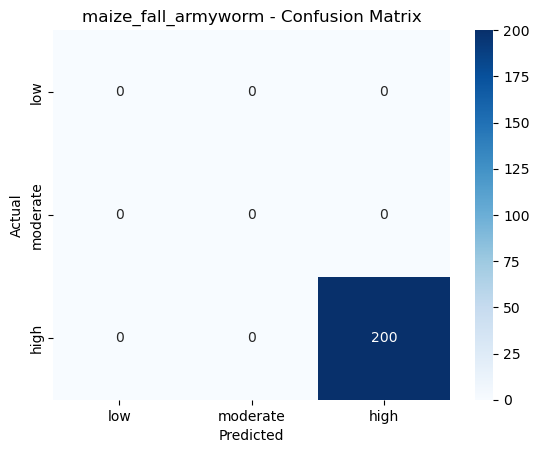


🪲 MAIZE_EAR_ROT Classification Report
              precision    recall  f1-score   support

        high       0.91      0.93      0.92       165
    moderate       0.63      0.54      0.58        35

    accuracy                           0.86       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.86      0.86      0.86       200



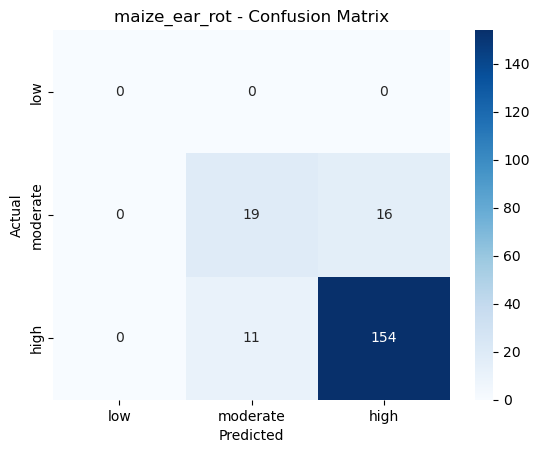


🪲 MAIZE_STEM_BORER Classification Report
              precision    recall  f1-score   support

        high       0.63      0.63      0.63       109
    moderate       0.56      0.55      0.55        91

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



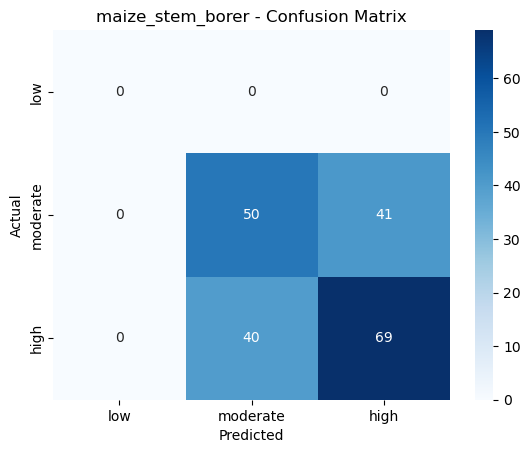

In [21]:
# Run for all pests
for pest in targets.keys():
    train_and_plot_confusion(pest)

In [23]:
# Use the real dataset with climate columns
real_df = merged_df  # or whatever your real combined DataFrame is called

real_features = real_df[['T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'PRECTOTCORR', 'QV2M', 'WS2M_RANGE']]


NameError: name 'merged_df' is not defined

In [25]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)
n_samples = 500

# 🌤 Generate realistic weather variables
temperature_max = np.random.normal(33, 2.5, n_samples)
temperature_min = np.random.normal(20, 2.0, n_samples)
rainfall = np.random.normal(2.0, 1.5, n_samples)   # Rainfall
humidity = np.random.normal(13, 2.0, n_samples)           # Humidity
wind_speed = np.random.normal(0.4, 0.1, n_samples)    # Wind Speed

# 🧹 Clip to realistic boundaries
temperature_max = np.clip(temperature_max, 28, 38)
temperature_min = np.clip(temperature_min, 15, 25)
rainfall= np.clip(rainfall, 0, 8)
humidity = np.clip(humidity, 10, 18)
wind_speed = np.clip(wind_speed, 0.2, 0.6)

# 📦 Create DataFrame
data_df = pd.DataFrame({
    'temperature_max': temperature_max,
    'temperature_min': temperature_min,
    'rainfall': rainfall,
    'humidi': QV2M,
    'WS2M_RANGE': WS2M_RANGE
})

# 🐛 Pest label logic
def classify_fall_armyworm(row):
    score = 0
    if row['temperature_max'] > 34: score += 1
    if row['rainfall'] < 1.5: score += 1
    if (row['temperature_max'] - row['temperature_min']) > 13: score += 1  # Still using internal range logic
    return min(score, 2)

def classify_ear_rot(row):
    score = 0
    if row['rainfall'] > 2.5: score += 1
    if row['humidity'] > 14: score += 1
    return min(score, 2)

def classify_stem_borer(row):
    score = 0
    if (row['temperature_max'] - row['temperature_min']) > 13: score += 1
    if row['wind_speed'] < 0.4: score += 1
    return min(score, 2)

# 🏷 Convert numeric score → Label
level_map = {0: 'Low', 1: 'Moderate', 2: 'High'}

data_df['fall_armyworm'] = data_df.apply(classify_fall_armyworm, axis=1).map(level_map)
data_df['ear_rot'] = data_df.apply(classify_ear_rot, axis=1).map(level_map)
data_df['stem_borer'] = data_df.apply(classify_stem_borer, axis=1).map(level_map)

# 💾 Save to CSV
data_df.to_csv("maize_pest_weather.csv", index=False)

# 🔍 Preview
data_df.head()


,T2M_MAX,T2M_MIN,T2M_RANGE,PRECTOTCORR,QV2M,WS2M_RANGE,fall_armyworm,ear_rot,stem_borer
0,34.241785,21.852355,12.389430,4.099033,14.556722,0.332482,Moderate,High,Moderate
1,32.654339,23.818833,8.835506,3.386951,11.897629,0.385548,Low,Moderate,Moderate
2,34.619221,17.202865,17.416356,2.089446,11.363602,0.320758,High,Low,High
3,36.807575,21.125938,15.681636,1.029595,12.993251,0.369204,NaN,Low,High
4,32.414617,18.698715,13.715902,3.047335,12.659631,0.210639,Moderate,Moderate,High
